#### IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### DATASET DESCRIPTION

1. Gender: Gender type of student - ['Boy' 'Girl']
2. Age: Age range of the student - ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
3. Education Level: Education institution level - ['University' 'College' 'School']
4. Institution Type: Education institution type - ['Non Government' 'Government']
5. IT Student: Studying as IT student or not - ['No' 'Yes']
6. Location: Is student location in town - ['Yes' 'No']
7. Load-shedding: Level of load shedding - ['Low' 'High']
8. Financial Condition: Financial condition of family - ['Mid' 'Poor' 'Rich']
9. Internet Type: Internet type used mostly in device - ['Wifi' 'Mobile Data']
10. Network Type: Network connectivity type - ['4G' '3G' '2G']
11. Class Duration: Daily class duration - ['3-6' '1-3' '0']
12. Self Lms: Institution’s own LMS availability - ['No' 'Yes']
13. Device: Device used mostly in class - ['Tab' 'Mobile' 'Computer']
14. Adaptivity Level: Adaptability level of the student - ['Moderate' 'Low' 'High']

#### LOADING THE DATASET

In [2]:
df = pd.read_csv("students_adaptability_level_online_education.csv")
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [3]:
df.shape

(1205, 14)

In [4]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

#### SUMMARY STATISTICS

In [5]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


In [6]:
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

#### PRINTING UNIQUE VALUES OF EACH COLUMN

In [7]:
for i in df:
    print(i,": ",df[i].unique())

Gender :  ['Boy' 'Girl']
Age :  ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
Education Level :  ['University' 'College' 'School']
Institution Type :  ['Non Government' 'Government']
IT Student :  ['No' 'Yes']
Location :  ['Yes' 'No']
Load-shedding :  ['Low' 'High']
Financial Condition :  ['Mid' 'Poor' 'Rich']
Internet Type :  ['Wifi' 'Mobile Data']
Network Type :  ['4G' '3G' '2G']
Class Duration :  ['3-6' '1-3' '0']
Self Lms :  ['No' 'Yes']
Device :  ['Tab' 'Mobile' 'Computer']
Adaptivity Level :  ['Moderate' 'Low' 'High']


#### CHECKING FOR NULL VALUES

In [8]:
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

#### EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Device', ylabel='count'>

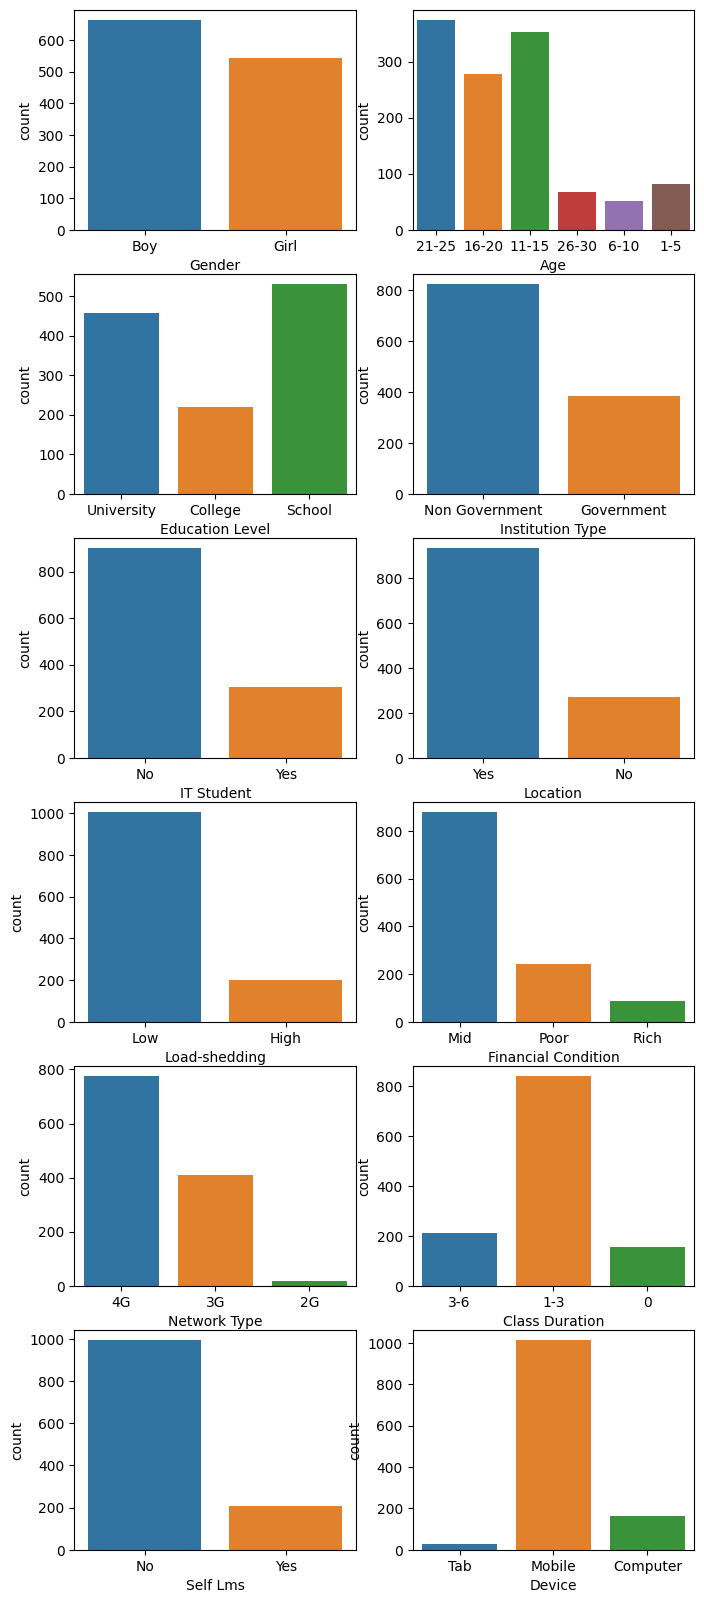

In [9]:
plt.figure(figsize=(8,20))
plt.subplot(6, 2, 1)
sns.countplot(x=df['Gender'],data = df)
plt.subplot(6, 2, 2)
sns.countplot(x=df['Age'], data = df)
plt.subplot(6, 2, 3)
sns.countplot(x=df['Education Level'], data = df)
plt.subplot(6, 2, 4)
sns.countplot(x=df['Institution Type'], data = df)
plt.subplot(6, 2, 5)
sns.countplot(x=df['IT Student'], data = df)
plt.subplot(6, 2, 6)
sns.countplot(x=df['Location'], data = df)
plt.subplot(6, 2, 7)
sns.countplot(x=df['Load-shedding'], data = df)
plt.subplot(6, 2, 8)
sns.countplot(x=df['Financial Condition'], data = df)
plt.subplot(6, 2, 9)
sns.countplot(x=df['Network Type'], data = df)
plt.subplot(6, 2, 10)
sns.countplot(x=df['Class Duration'], data = df)
plt.subplot(6, 2, 11)
sns.countplot(x=df['Self Lms'], data = df)
plt.subplot(6, 2, 12)
sns.countplot(x=df['Device'], data = df)

<Axes: xlabel='Device', ylabel='count'>

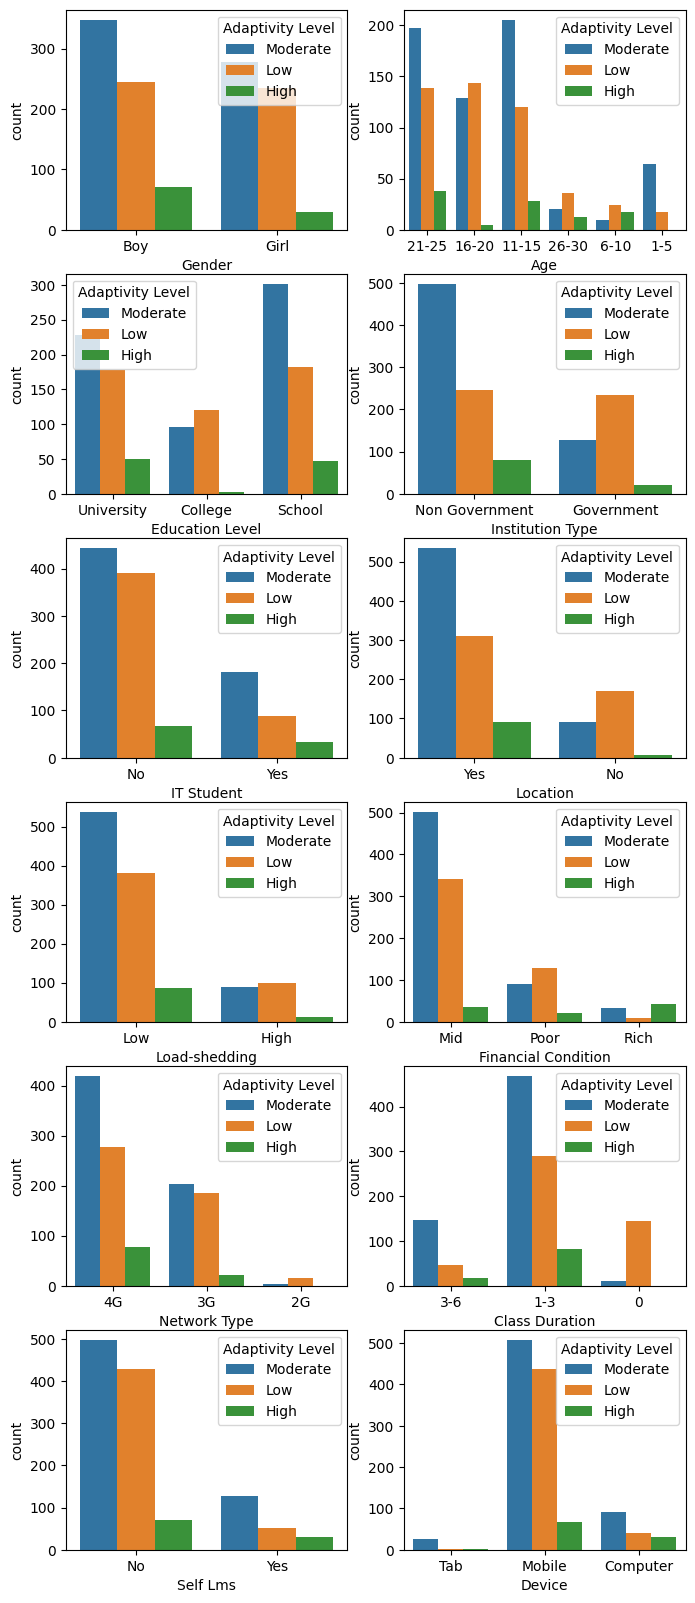

In [10]:
plt.figure(figsize=(8,20))
plt.subplot(6, 2, 1)
sns.countplot(x=df['Gender'],hue=df['Adaptivity Level'], data = df)
plt.subplot(6, 2, 2)
sns.countplot(x=df['Age'],hue=df['Adaptivity Level'], data = df)
plt.subplot(6, 2, 3)
sns.countplot(x=df['Education Level'],hue=df['Adaptivity Level'], data = df)
plt.subplot(6, 2, 4)
sns.countplot(x=df['Institution Type'],hue=df['Adaptivity Level'], data = df)
plt.subplot(6, 2, 5)
sns.countplot(x=df['IT Student'],hue=df['Adaptivity Level'], data = df)
plt.subplot(6, 2, 6)
sns.countplot(x=df['Location'],hue=df['Adaptivity Level'], data = df)
plt.subplot(6, 2, 7)
sns.countplot(x=df['Load-shedding'],hue=df['Adaptivity Level'], data = df)
plt.subplot(6, 2, 8)
sns.countplot(x=df['Financial Condition'],hue=df['Adaptivity Level'], data = df)
plt.subplot(6, 2, 9)
sns.countplot(x=df['Network Type'],hue=df['Adaptivity Level'], data = df)
plt.subplot(6, 2, 10)
sns.countplot(x=df['Class Duration'],hue=df['Adaptivity Level'], data = df)
plt.subplot(6, 2, 11)
sns.countplot(x=df['Self Lms'],hue=df['Adaptivity Level'], data = df)
plt.subplot(6, 2, 12)
sns.countplot(x=df['Device'],hue=df['Adaptivity Level'], data = df)

#### DATA TRANSFORMATION

In [11]:
df = pd.get_dummies(df,columns=['Gender'])
df = pd.get_dummies(df,columns=['Age'])
df = pd.get_dummies(df,columns=['Education Level'])
df = pd.get_dummies(df,columns=['Institution Type'])
df = pd.get_dummies(df,columns=['IT Student'])
df = pd.get_dummies(df,columns=['Location'])
df = pd.get_dummies(df,columns=['Load-shedding'])
df = pd.get_dummies(df,columns=['Financial Condition'])
df = pd.get_dummies(df,columns=['Internet Type'])
df = pd.get_dummies(df,columns=['Network Type'])
df = pd.get_dummies(df,columns=['Class Duration'])
df = pd.get_dummies(df,columns=['Self Lms'])
df = pd.get_dummies(df,columns=['Device'])
df['Adaptivity Level']=LabelEncoder().fit_transform(df['Adaptivity Level'])

In [12]:
df.columns

Index(['Adaptivity Level', 'Gender_Boy', 'Gender_Girl', 'Age_1-5', 'Age_11-15',
       'Age_16-20', 'Age_21-25', 'Age_26-30', 'Age_6-10',
       'Education Level_College', 'Education Level_School',
       'Education Level_University', 'Institution Type_Government',
       'Institution Type_Non Government', 'IT Student_No', 'IT Student_Yes',
       'Location_No', 'Location_Yes', 'Load-shedding_High',
       'Load-shedding_Low', 'Financial Condition_Mid',
       'Financial Condition_Poor', 'Financial Condition_Rich',
       'Internet Type_Mobile Data', 'Internet Type_Wifi', 'Network Type_2G',
       'Network Type_3G', 'Network Type_4G', 'Class Duration_0',
       'Class Duration_1-3', 'Class Duration_3-6', 'Self Lms_No',
       'Self Lms_Yes', 'Device_Computer', 'Device_Mobile', 'Device_Tab'],
      dtype='object')

In [13]:
df.head()

,Adaptivity Level,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,...,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,2,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,2,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,2,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
3,2,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,1,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0


#### CORRELATION ANALYSIS

<Axes: >

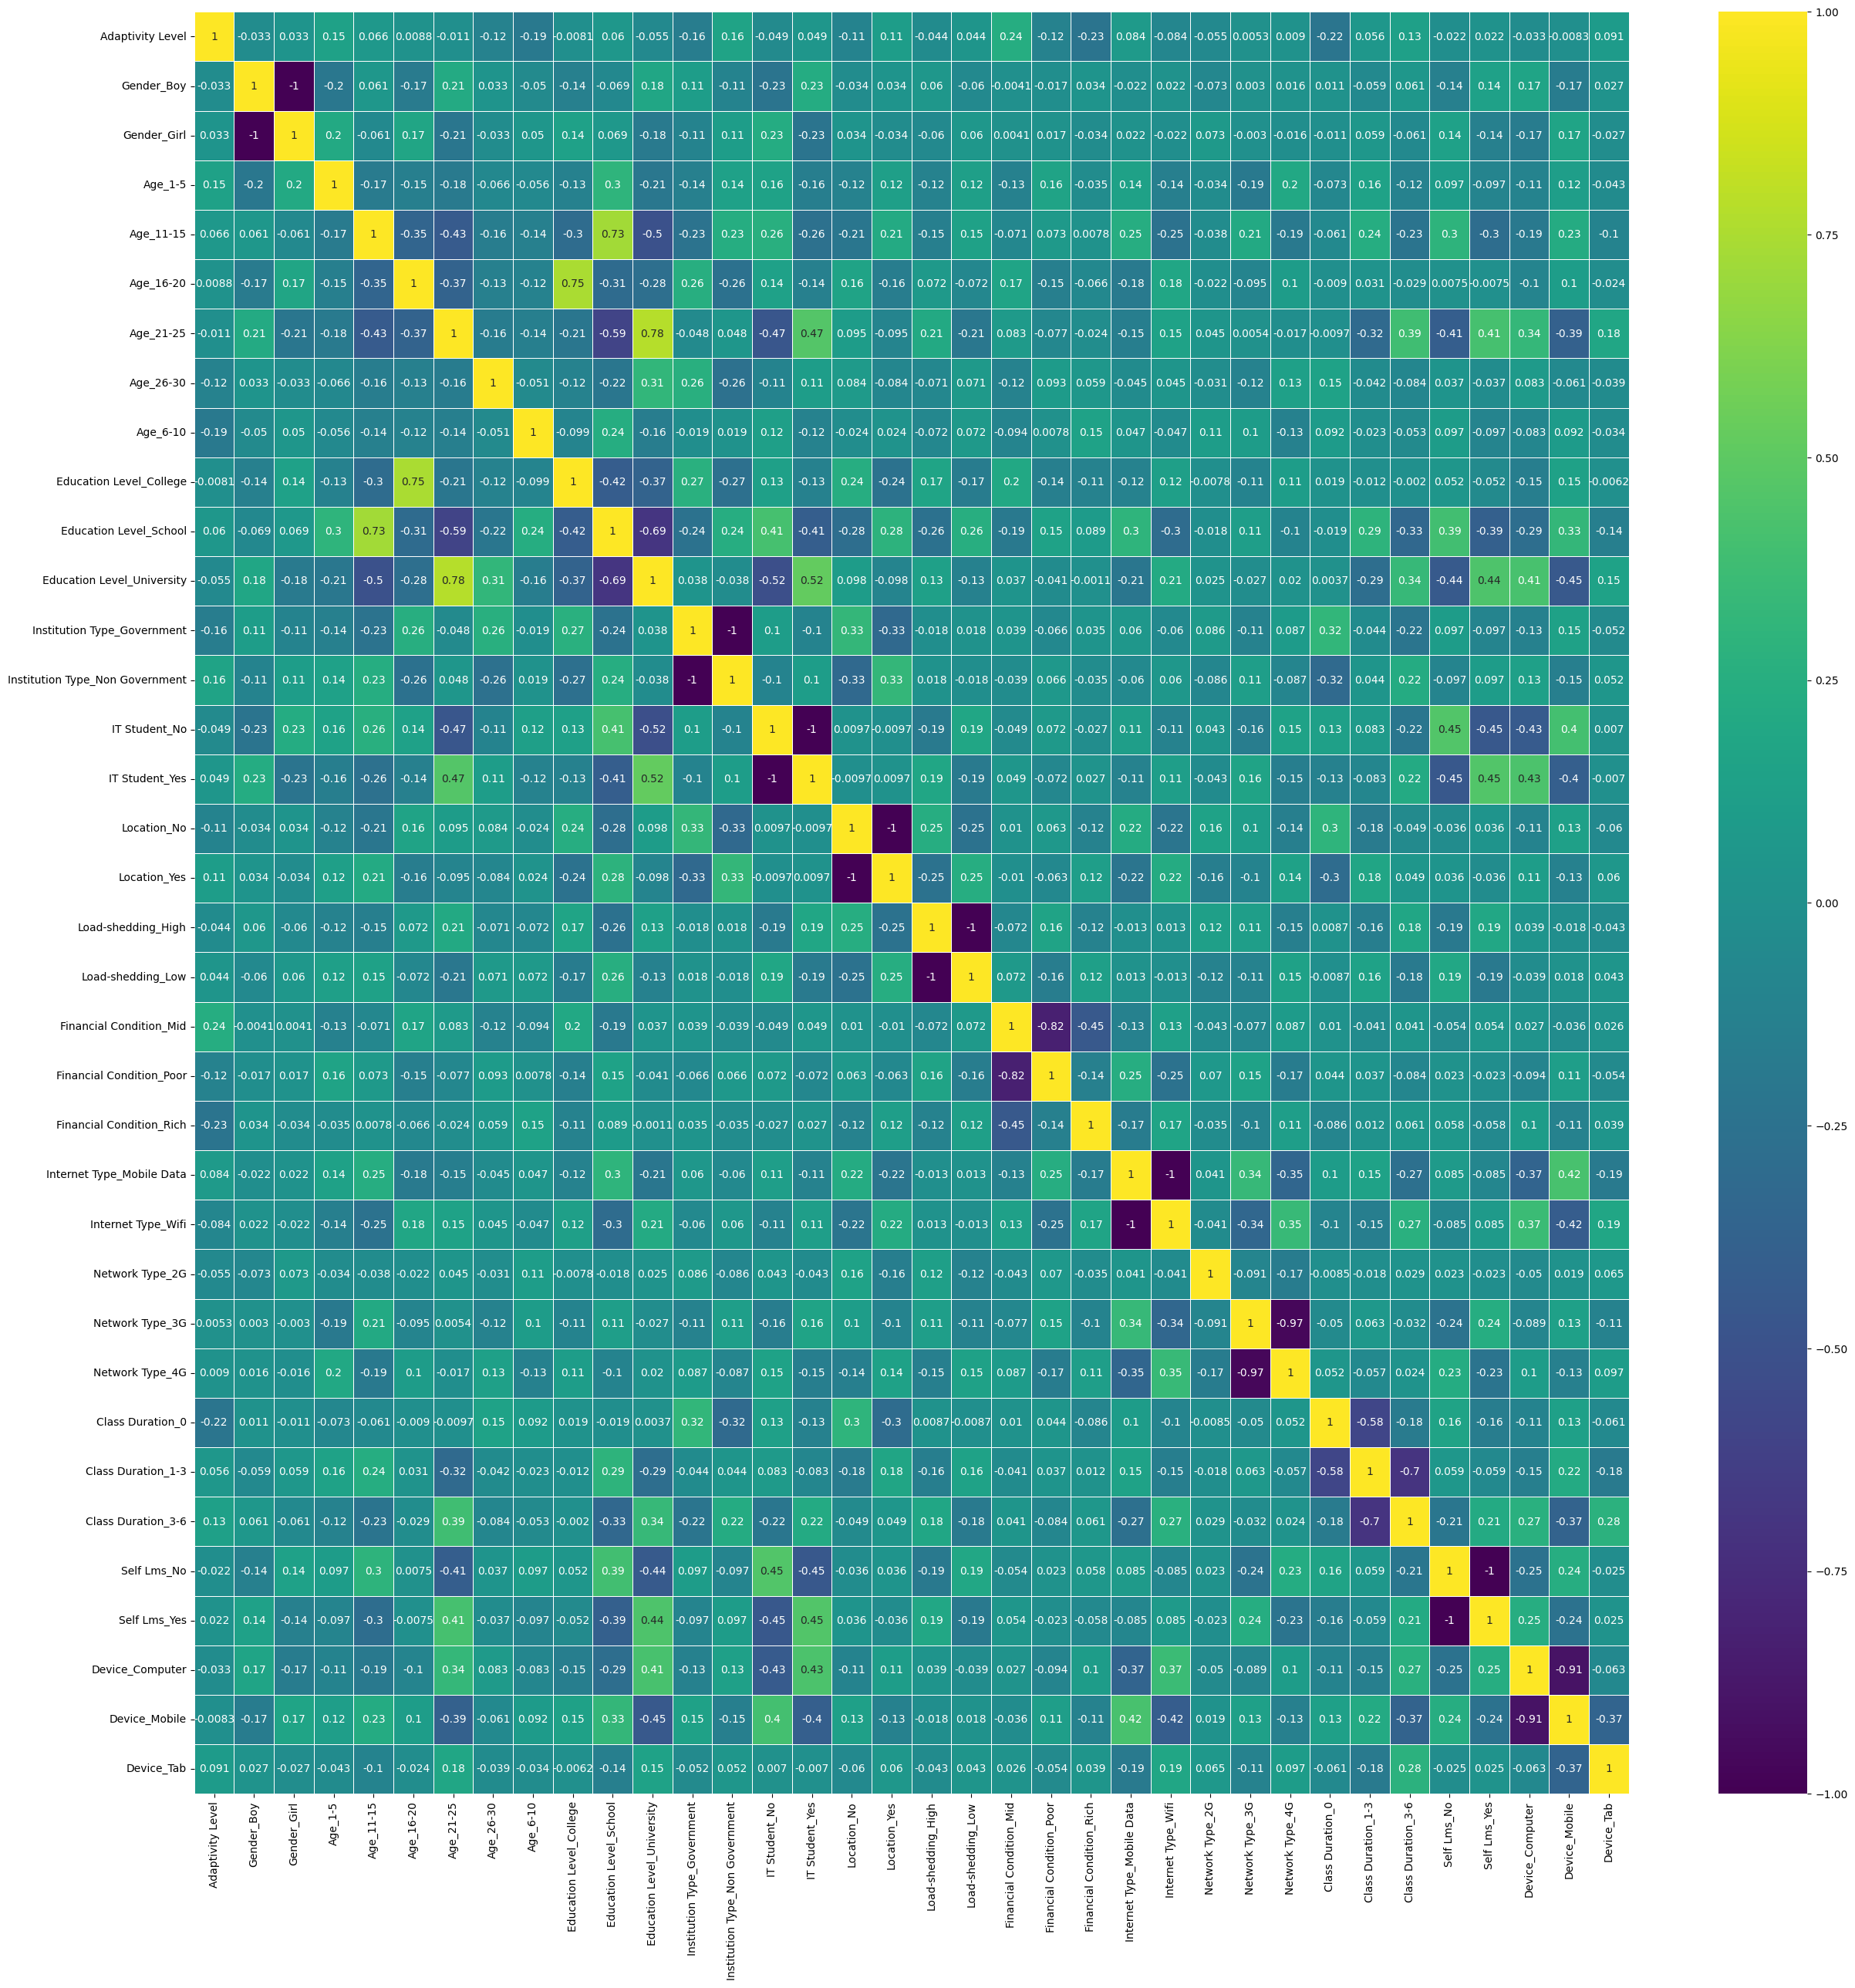

In [14]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

In [15]:
df.describe()

,Adaptivity Level,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,...,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,...,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,1.435685,0.550207,0.449793,0.067220,0.292946,0.230705,0.310373,0.056432,0.042324,0.181743,...,0.341079,0.643154,0.127801,0.697095,0.175104,0.825726,0.174274,0.134440,0.840664,0.024896
std,0.642013,0.497679,0.497679,0.250506,0.455303,0.421459,0.462839,0.230849,0.201410,0.385792,...,0.474269,0.479268,0.334007,0.459705,0.380214,0.379502,0.379502,0.341266,0.366141,0.155874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### TRAIN-TEST SPLIT

In [16]:
Y = df['Adaptivity Level']
X = df.drop('Adaptivity Level',axis=1)
X.shape, Y.shape

((1205, 35), (1205,))

In [17]:
Y.value_counts()

2    625
1    480
0    100
Name: Adaptivity Level, dtype: int64

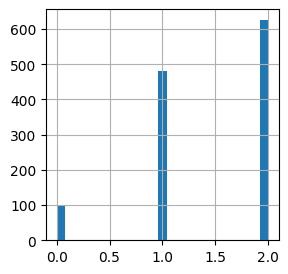

In [18]:
Y.hist(bins = 25,figsize = (3,3))
plt.show()

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)

#### HANDLING CLASS IMBALANCE

In [20]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, Y_resampled = smote_enn.fit_resample(X, Y)
X_train2,X_test2,Y_train2,Y_test2=train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=70)

In [21]:
Y_resampled.value_counts()

0    528
2    462
1    451
Name: Adaptivity Level, dtype: int64

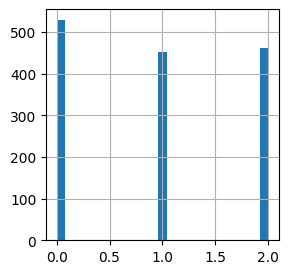

In [22]:
Y_resampled.hist(bins = 25,figsize = (3,3))
plt.show()

#### K-NN ALGORITHM

Model accuracy on train is:  0.9782986111111112
Model accuracy on test is:  0.9550173010380623
--------------------------------------------------
Model precision score on test is:  0.955
--------------------------------------------------
Model recall score on test is:  0.955
--------------------------------------------------
Model F1 score on test is:  0.955
--------------------------------------------------


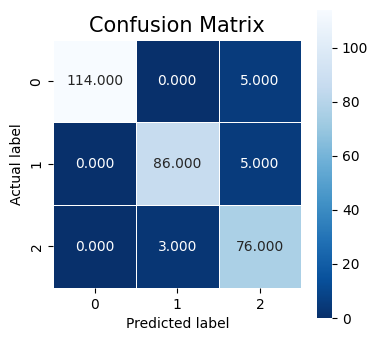

In [23]:
#SMOTE
#fit the model on train data 
knn_clf2 = KNeighborsClassifier(n_neighbors=7).fit(X_train2,Y_train2)

#accuracy on train
train_preds_knn = knn_clf2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds_knn))

#predict on test
test_preds_knn = knn_clf2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds_knn))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds_knn,average='micro'),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds_knn,average='micro'),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds_knn,average='micro'),3))
print('-'*50)
cm = confusion_matrix(Y_test2, test_preds_knn)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

#### DECISION TREES ALGORITHM

Model accuracy on train is:  0.9826388888888888
Model accuracy on test is:  0.9792387543252595
--------------------------------------------------
Model precision score on test is:  0.979
--------------------------------------------------
Model recall score on test is:  0.979
--------------------------------------------------
Model F1 score on test is:  0.979
--------------------------------------------------


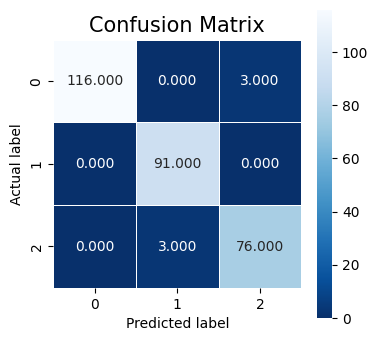

In [24]:
# SMOTE

#fit the model on train data 
dt_clf = DecisionTreeClassifier(max_depth=12).fit(X_train2,Y_train2)

#predict on test
test_preds_dt2 = dt_clf.predict(X_test2)
#accuracy on test
print("Model accuracy on train is: ", accuracy_score(Y_train2, dt_clf.predict(X_train2)))
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds_dt2))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds_dt2,  average='micro'),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds_dt2,  average='micro'),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds_dt2,  average='micro'),3))
print('-'*50)
cm = confusion_matrix(Y_test2, test_preds_dt2)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

#### RANDOM FOREST ALGORITHM

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9930795847750865
--------------------------------------------------
Model precision score on test is:  0.993
--------------------------------------------------
Model recall score on test is:  0.993
--------------------------------------------------
Model F1 score on test is:  0.993
--------------------------------------------------


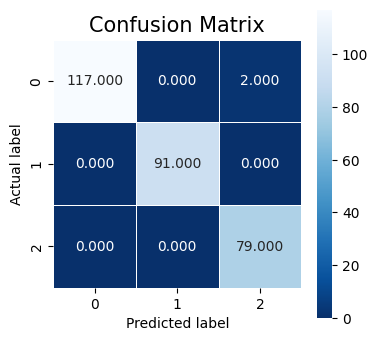

In [25]:
# SMOTE

#fit the model on train data 
rf_clf=RandomForestClassifier(max_depth=20).fit(X_train2,Y_train2)

#predict on test
test_preds_rf2 = rf_clf.predict(X_test2)
#accuracy on test
print("Model accuracy on train is: ", accuracy_score(Y_train2, rf_clf.predict(X_train2)))
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds_rf2))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds_rf2,  average='micro'),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds_rf2,  average='micro'),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds_rf2,  average='micro'),3))
print('-'*50)
cm = confusion_matrix(Y_test2, test_preds_rf2)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

#### HYPER-PARAMETER TUNING

In [26]:
n_estimators = [5,20,50,100] # number of trees in the random forest
# max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf}

In [27]:
# from sklearn.ensemble import RandomForestClassifer
rf = RandomForestClassifier()

In [28]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35)

In [29]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=1, min_samples_split=6, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=40, min_sample

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=10, n_estimators=5; total time=   0.0s


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=110, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=40, min_samples_leaf=3, min_samples_split=10, n_estimators=50; total tim

[CV] END max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=100, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=110, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=110, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=110, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=110, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=110, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=2, n_estimators=50; 

[CV] END max_depth=80, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=80, min_samples_leaf=4, min_samples_split=6, n_estimators=20; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=1, min_samples_split=10, n_estimators=20; total time=   

[CV] END max_depth=100, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=100, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=100, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=90, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=90, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=90, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=90, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=90, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total 

[CV] END max_depth=60, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=60, min_samples_leaf=3, min_samples_split=2, n_estimators=100; total time=   0.1s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [30]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40}  



Model accuracy on train is:  1.0
Model accuracy on test is:  0.9930795847750865
--------------------------------------------------
Model precision score on test is:  0.993
--------------------------------------------------
Model recall score on test is:  0.993
--------------------------------------------------
Model F1 score on test is:  0.993
--------------------------------------------------


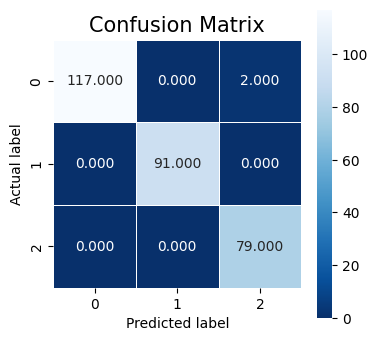

In [31]:
#fit the model on train data 
rf_clf2=RandomForestClassifier(n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_depth= 50).fit(X_train2,Y_train2)

#predict on test
test_preds_rf = rf_clf2.predict(X_test2)
#accuracy on test
print("Model accuracy on train is: ", accuracy_score(Y_train2, rf_clf2.predict(X_train2)))
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds_rf))
print('-'*50)
print("Model precision score on test is: ", round(precision_score(Y_test2, test_preds_rf,  average='micro'),3))
print('-'*50)
print("Model recall score on test is: ", round(recall_score(Y_test2, test_preds_rf,  average='micro'),3))
print('-'*50)
print("Model F1 score on test is: ", round(f1_score(Y_test2, test_preds_rf,  average='micro'),3))
print('-'*50)
cm = confusion_matrix(Y_test2, test_preds_rf)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);
plt.show()

#### After the model performance evaluation it can be concluded that Random Forest best fits the dataset and is performing best for Student's Adaptibility level prediction.

#### After hyper-parameter tuning it was found that the default model was performing equally well.

#### SAVING THE MODEL

In [32]:
import pickle
pickle.dump(rf_clf, open("model2.pkl","wb"))